# Metropolis-Hastings algorithm

As we have seen in the slides, for a generic target $\pi(x) \propto \gamma(x)$ and a proposal $q(x' | x)$, the Metropolis-Hastings algorithm is defined as follows. Given the state of chain $x_{n-1}$, one iteration of this method goes as follows:

- Sample $x'$ from $q(x' | x_{n-1})$
- Compute the acceptance probability $\alpha(x_{n-1}, x') = \min\left(1, \frac{\pi(x') q(x_{n-1} | x')}{\pi(x_{n-1}) q(x' | x_{n-1})}\right)$
- Sample $u \sim \mathcal{U}(0, 1)$
- If $u < \alpha(x_{n-1}, x')$, set $x_n = x'$, otherwise set $x_n = x_{n-1}$
- Repeat

Let us try this on the Banana density example. Recall that this density is defined on $\mathbb{R}^2$ and is given by
\begin{align*}
\pi(x) \propto \exp\left(-\frac{x_1^2}{10} - \frac{x_2^2}{10} - 2 (x_2 - x_1^2)^2\right).
\end{align*}
In this case, we have the unnormalised density
\begin{align*}
\Pi(x) = \exp\left(-\frac{x_1^2}{10} - \frac{x_2^2}{10} - 2 (x_2 - x_1^2)^2\right).
\end{align*}
We will now choose our proposal as the random walk proposal
\begin{align*}
q(x' | x) = \mathcal{N}(x'; x, \sigma_q^2 I),
\end{align*}
where $\sigma_q^2$ is a parameter that we can tune. We will also choose the initial state of the chain to be $x_0 = (0, 0)$.

Note that, since $q(x' | x) = q(x | x')$, the acceptance probability simplifies to
\begin{align*}
\alpha(x_{n-1}, x') = \min\left(1, \frac{\pi(x')}{\pi(x_{n-1})}\right).
\end{align*}
The following code implements the Metropolis-Hastings algorithm for the Banana density.

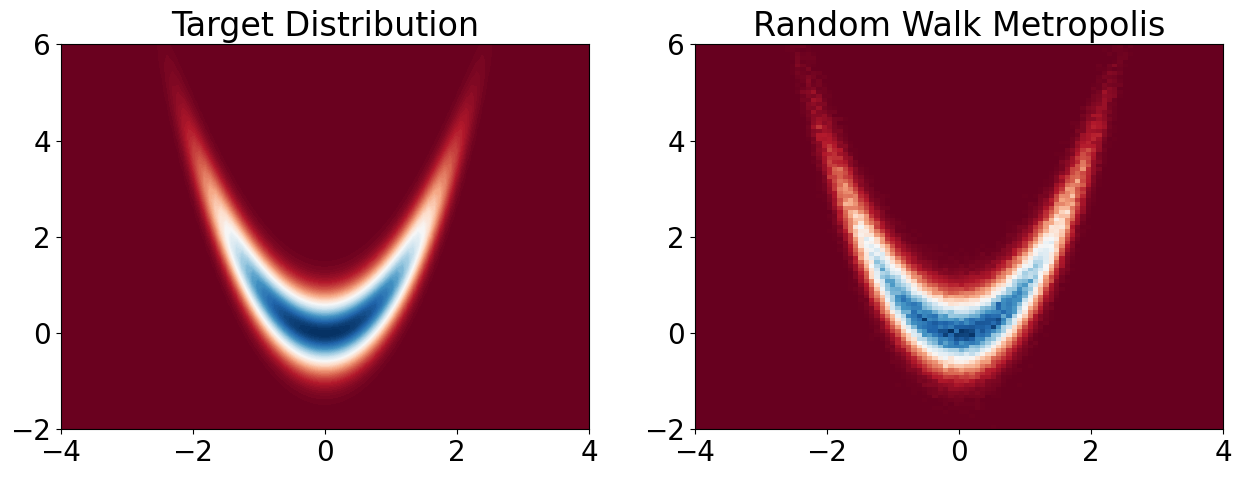

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(24)

# banana function for testing MCMC
def logPi(x):
    return -x[0]**2/10 - x[1]**2/10 - 2 * (x[1] - x[0]**2)**2

N = 1000000
samples_RW = np.zeros((2, N))

# initial values
x_1 = 0
x_2 = 0
samples_RW[:, 0] = np.array([x_1, x_2])
# parameters
gamma = 0.005

sigma_rw = 0.5

burnin = 200

for n in range(1, N):
    # random walk
    x_s = samples_RW[:, n-1] + sigma_rw * np.random.randn(2)
    # metropolis
    u = rng.uniform(0, 1)

    if np.log(u) < logPi(x_s) - logPi(samples_RW[:, n-1]):
        samples_RW[:, n] = x_s
    else:
        samples_RW[:, n] = samples_RW[:, n-1]


# for surf plot banana 2d
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb, Y_bb = np.meshgrid(x_bb, y_bb)
Z_bb = np.exp(logPi([X_bb, Y_bb]))

plt.figure(figsize=(15, 5))
# make fonts bigger
plt.rcParams.update({'font.size': 20})
plt.subplot(1, 2, 1)
cnt = plt.contourf(X_bb, Y_bb, Z_bb, 100, cmap='RdBu')
plt.title('Target Distribution')

plt.subplot(1, 2, 2)
plt.hist2d(samples_RW[0, burnin:n], samples_RW[1, burnin:n], 100, cmap='RdBu', range=[[-4, 4], [-2, 6]], density=True)
# remove the white edges from plt.hist2d
plt.title('Random Walk Metropolis')
plt.show()